# 打开CZI文件
在处理显微镜图像数据时，有许多流通的文件格式，如Carl Zeiss Image（CZI）格式。在本笔记本中，我们将使用[`czifile`库](https://pypi.org/project/czifile/)来打开一个`.czi`文件。

注意：建议使用[AICSImageIO](https://github.com/AllenCellModeling/aicsimageio)来读取CZI文件，如本[笔记本](image_file_formats:aicsimagio)所示。

另请参阅
* [在Python中读取CZI文件（image.sc论坛帖子）](https://forum.image.sc/t/reading-czi-file-in-python/39768/11))

In [1]:
import czifile

from pathlib import Path
from skimage.io import imshow
import numpy as np

我们通常可以通过向`imread`函数提供图像路径来打开图像。在接下来的内容中，我们将使用一张由Romina Piscitello-Gómez（MPI CBG）提供的显示蛹期果蝇翅膀的图像。

In [2]:
image = czifile.imread(Path("../../data/PupalWing.czi"))

第一个好的步骤是检查图像的维度。

In [3]:
image.shape

(1, 1, 1, 80, 520, 692, 1)

这些格式通常有额外的维度以适应多种不同的数据形状。以下是在处理CZI文件时的常见顺序：
- 'X'：'宽度'
- 'Y'：'高度'
- 'C'：'通道'
- 'Z'：'切片'（深度）
- 'T'：'时间'
- 'R'：'旋转'
- 'S'：'场景' / 马赛克图像中的连续感兴趣区域

我们知道我们的图像在采集时有三个维度。去除不必要的额外维度的一个技巧是使用[np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html)函数。

In [4]:
image_squeezed = np.squeeze(image)
image_squeezed.shape

(80, 520, 692)

这个图像是一个numpy数组，因此我们可以正常使用它。

In [5]:
type(image_squeezed)

numpy.ndarray

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


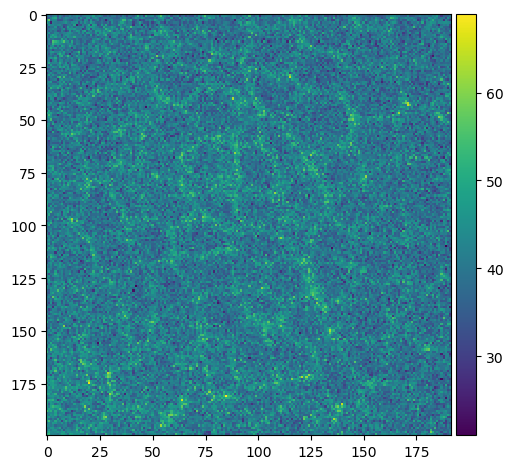

In [6]:
cropped_slice_image = image_squeezed[40, 200:400, 500:700]

imshow(cropped_slice_image)